# CNN - Image classification model

In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

### 1) Loading and preprocessing the Image data

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()
input_shape = (28 , 28 , 1)

__Reshape changes the shape of the image without changing the total size. For example, you can reshape image from 100x100 to 10x1000 or to 1x100x100.__

In [5]:
x_train = x_train.reshape(x_train.shape[0] , 28 , 28 , 1)
x_test = x_test.reshape(x_test.shape[0] , 28 , 28 , 1)

__Python astype() method enables us to set or convert the data type of an existing data column in a dataset or a data frame.__
__By this, we can change or transform the type of the data values or single or multiple columns to altogether another form using astype() function.__

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

### 2) Training the Model

In [7]:
x_train = x_train/255
x_test = x_test/255

print("Shape of Training : " , x_train.shape)
print("Shae of Testing : " , x_test.shape)

Shape of Training :  (60000, 28, 28, 1)
Shae of Testing :  (10000, 28, 28, 1)


### 2)Defining Model Architecture

__Flatten layers => are used when you got a multidimensional output and you want to make it linear to pass it onto a Dense layer.__
se.

__Dense layers => are used when association can exist among any feature to any other feature in data point .Since between two layers of size n1 and n2, there can n1∗n2 connections and these are referred to as Dense__

__conv layers => these are important when nearby associations among the features matter, example object detection. Neighborhoods matter to classify or detect.__

__Dropout is a way of cutting too much association among features by dropping the weights (edges) at a probability.__

In [13]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_2 (Dense)             (None, 200)               946600    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                      

### 4) Estimating Model Performance

__LOSS => In machine learning, Loss function is used to find error or deviation in the learning process. Keras requires loss function during model compilation process.__

__METRICS => In machine learning, Metrics is used to evaluate the performance of your model.__

__Optimization => is an important process which optimize the input weights by comparing the prediction and the loss function.__

In [14]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train, y_train, epochs = 2)

Epoch 1/2
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2052 - accuracy: 0.9378
Epoch 2/2
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0877 - accuracy: 0.9734


__Evaluation is a process during development of the model to check whether the model is best fit for the given problem and corresponding data.__

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0669 - accuracy: 0.9795
Loss=0.067
Accuracy=0.979


__The imshow() function in pyplot module of matplotlib library is used to display data as an image; i.e. on a 2D regular raster.__

__The squeeze() function in NumPy is used to remove an axis of length 1 from an input array. Axes in NumPy are defined for arrays having more than one dimension.__

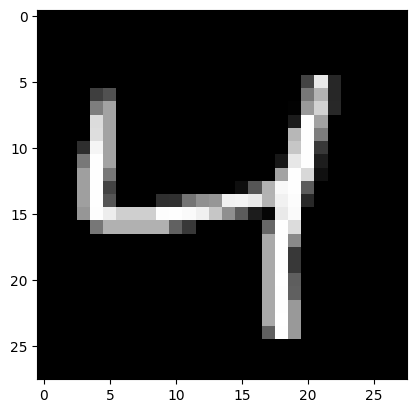

In [17]:
image = x_train[2]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [19]:
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
predict_model = model.predict([image])
print("Predicted class: {}".format(np.argmax(predict_model)))

InvalidArgumentError: Graph execution error:

Detected at node sequential_1/conv2d_1/BiasAdd defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 725, in start

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code

  File "C:\Users\Shree\AppData\Local\Temp\ipykernel_1488\2818876443.py", line 2, in <module>

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2631, in predict

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2416, in predict_function

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2401, in step_function

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2389, in run_step

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2357, in predict_step

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 589, in __call__

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 311, in call

Computed output size would be negative: -1 [input_size: 1, effective_filter_size: 3, stride: 1]
	 [[{{node sequential_1/conv2d_1/BiasAdd}}]] [Op:__inference_predict_function_35307]